# RFM Assignment - هشام مدحت محمود 2020498820 G2

In [37]:
import pandas as pd
import numpy as np
import datetime as dt
import pytz

In [38]:
df = pd.read_csv('2019-Nov.csv')
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4635837 entries, 0 to 4635836
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 318.3+ MB


In [40]:
df.shape

(4635837, 9)

In [41]:
df['event_type'].value_counts()

view                2076132
cart                1311807
remove_from_cart     925481
purchase             322417
Name: event_type, dtype: int64

In [42]:
df = df.query('event_type=="purchase"')

In [43]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
30,2019-11-01 00:01:57 UTC,purchase,5839412,1487580006551913373,NaN,lovely,3.16,460304619,9f777569-bdf3-47e5-a3d4-dfc26beb29cb
32,2019-11-01 00:01:57 UTC,purchase,5823969,1487580005268456287,NaN,uno,17.46,460304619,9f777569-bdf3-47e5-a3d4-dfc26beb29cb
33,2019-11-01 00:01:57 UTC,purchase,5810480,1487580011283087468,NaN,NaN,22.54,460304619,9f777569-bdf3-47e5-a3d4-dfc26beb29cb
61,2019-11-01 00:04:33 UTC,purchase,24380,1487580012994363565,NaN,depilflax,5.24,564451209,861ab2f1-b2e5-886f-a93b-5b067eff081f
62,2019-11-01 00:04:33 UTC,purchase,26765,1487580013522845895,NaN,ardell,7.16,564451209,861ab2f1-b2e5-886f-a93b-5b067eff081f


In [44]:
df.shape

(322417, 9)

In [45]:
df.drop(['product_id', 'category_id','category_code','brand','user_session'], axis=1, inplace=True)

In [46]:
df.head()

,event_time,event_type,price,user_id
30,2019-11-01 00:01:57 UTC,purchase,3.16,460304619
32,2019-11-01 00:01:57 UTC,purchase,17.46,460304619
33,2019-11-01 00:01:57 UTC,purchase,22.54,460304619
61,2019-11-01 00:04:33 UTC,purchase,5.24,564451209
62,2019-11-01 00:04:33 UTC,purchase,7.16,564451209


In [47]:
df.duplicated().sum()

85701

In [48]:
df.drop_duplicates(inplace=True)

In [49]:
df.shape

(236716, 4)

In [50]:
df.head()

,event_time,event_type,price,user_id
30,2019-11-01 00:01:57 UTC,purchase,3.16,460304619
32,2019-11-01 00:01:57 UTC,purchase,17.46,460304619
33,2019-11-01 00:01:57 UTC,purchase,22.54,460304619
61,2019-11-01 00:04:33 UTC,purchase,5.24,564451209
62,2019-11-01 00:04:33 UTC,purchase,7.16,564451209


In [51]:
df['event_time'] = pd.to_datetime(df['event_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236716 entries, 30 to 4634839
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype              
---  ------      --------------   -----              
 0   event_time  236716 non-null  datetime64[ns, UTC]
 1   event_type  236716 non-null  object             
 2   price       236716 non-null  float64            
 3   user_id     236716 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(1)
memory usage: 9.0+ MB


In [52]:
df.head()

,event_time,event_type,price,user_id
30,2019-11-01 00:01:57+00:00,purchase,3.16,460304619
32,2019-11-01 00:01:57+00:00,purchase,17.46,460304619
33,2019-11-01 00:01:57+00:00,purchase,22.54,460304619
61,2019-11-01 00:04:33+00:00,purchase,5.24,564451209
62,2019-11-01 00:04:33+00:00,purchase,7.16,564451209


In [53]:
df['event_time'].max() , df['event_time'].min()

(Timestamp('2019-11-30 23:24:54+0000', tz='UTC'),
 Timestamp('2019-11-01 00:01:57+0000', tz='UTC'))

In [54]:
today = dt.datetime(2019,12,1)
today = today.astimezone(pytz.UTC)
print(today.tzinfo)
today

UTC


datetime.datetime(2019, 11, 30, 22, 0, tzinfo=<UTC>)

In [55]:
rfm = df.groupby('user_id').agg({'event_time':lambda date:(today-date.max()).days,
                                'event_type':lambda purchase:len(purchase),
                                'price':lambda price:price.sum()})
rfm.head()

,event_time,event_type,price
user_id,,,
9794320,5,2,7.72
10079204,24,2,25.81
10280338,9,10,34.72
15781728,13,2,20.31
19762782,20,2,20.29


In [56]:
rfm.columns=['Recency','Frequency','Monetary']
rfm.head()

,Recency,Frequency,Monetary
user_id,,,
9794320,5,2,7.72
10079204,24,2,25.81
10280338,9,10,34.72
15781728,13,2,20.31
19762782,20,2,20.29


In [57]:
rfm['R'] = pd.qcut(rfm['Recency'],4, ['1','2','3','4'])
rfm['F'] = pd.qcut(rfm['Frequency'],4,['4','3','2','1'])
rfm['M'] = pd.qcut(rfm['Monetary'],4,['4','3','2','1'])
rfm.head()

,Recency,Frequency,Monetary,R,F,M
user_id,,,,,,
9794320,5,2,7.72,1,4,4
10079204,24,2,25.81,4,4,3
10280338,9,10,34.72,2,2,2
15781728,13,2,20.31,3,4,3
19762782,20,2,20.29,3,4,3


In [58]:
rfm['RFM_Score'] = rfm['R'].astype(str)+ rfm['F'].astype(str) + rfm['M'].astype(str)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score
user_id,,,,,,,
9794320,5,2,7.72,1,4,4,144
10079204,24,2,25.81,4,4,3,443
10280338,9,10,34.72,2,2,2,222
15781728,13,2,20.31,3,4,3,343
19762782,20,2,20.29,3,4,3,343


In [59]:
rfm.sort_values(by=['RFM_Score', 'Monetary'], ascending=[True, False]).head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score
user_id,,,,,,,
546880217,2,38,980.87,1,1,1,111
539636703,1,108,773.86,1,1,1,111
400911344,1,67,744.04,1,1,1,111
578153500,2,24,679.19,1,1,1,111
247216055,1,81,665.59,1,1,1,111


<AxesSubplot:xlabel='RFM_Score'>

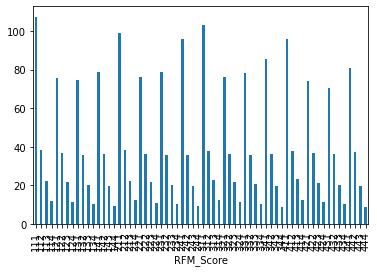

In [60]:
rfm.groupby('RFM_Score')['Monetary'].mean().plot(kind='bar')

In [61]:
rfm['Total_score'] = rfm['R'].astype(int) + rfm['F'].astype(int) + rfm['M'].astype(int)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score,Total_score
user_id,,,,,,,,
9794320,5,2,7.72,1,4,4,144,9
10079204,24,2,25.81,4,4,3,443,11
10280338,9,10,34.72,2,2,2,222,6
15781728,13,2,20.31,3,4,3,343,10
19762782,20,2,20.29,3,4,3,343,10


<AxesSubplot:xlabel='Total_score'>

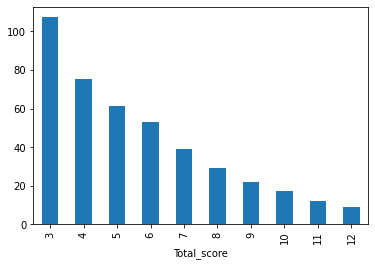

In [62]:
rfm.groupby('Total_score')['Monetary'].mean().plot.bar()

<AxesSubplot:xlabel='Total_score'>

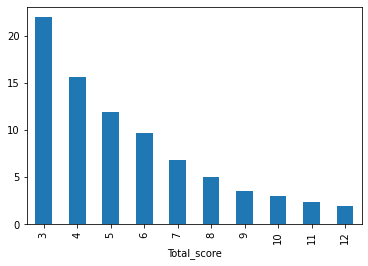

In [63]:
rfm.groupby('Total_score')['Frequency'].mean().plot.bar()

<AxesSubplot:xlabel='Total_score'>

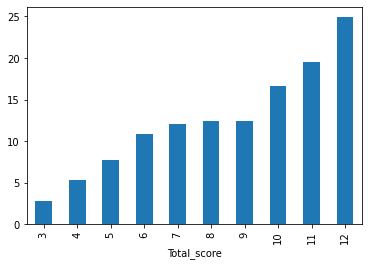

In [64]:
rfm.groupby('Total_score')['Recency'].mean().plot.bar()

In [65]:
print("Best Customers: ",len(rfm[rfm['RFM_Score']=='111']))
print('Loyal Customers: ',len(rfm[rfm['F']=='1']))
print("Big Spenders: ",len(rfm[rfm['M']=='1']))
print('Almost Lost: ', len(rfm[rfm['RFM_Score']=='211']))
print('Lost Customers: ',len(rfm[rfm['RFM_Score']=='411']))
print('Lost Cheap Customers: ',len(rfm[rfm['RFM_Score']=='444']))

Best Customers:  1952
Loyal Customers:  7096
Big Spenders:  7881
Almost Lost:  1152
Lost Customers:  728
Lost Cheap Customers:  1456
